Approach:
- Step 1: Input – Read an image
- Step 2: Saving the size of the input image in pixels
- Step 3: Get the Fourier Transform of the input_image
- Step 4: Assign the order n and cut-off frequency D_{0}
- Step 5: Designing filter: Butterworth Low Pass Filter
- Step 6: Convolution between the Fourier Transformed input image and the filtering mask
- Step 7: Take Inverse Fourier Transform of the convoluted image
- Step 8: Display the resultant image as output

In [222]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [223]:
originalImage = cv2.imread("../photos/Characters Test Pattern 688x688.tif", cv2.IMREAD_GRAYSCALE)
#originalImage = cv2.resize(originalImage, (512, 512))

In [224]:
# Generate Gaussian noise
noise = np.random.normal(7, 10, originalImage.shape).astype(np.uint8)
noisyImage = cv2.add(originalImage, noise)

In [225]:
# Perform fft on the noisy image
fftImage = np.fft.fftshift(np.fft.fft2(noisyImage))
magnitudeSpectrum = np.log(np.abs(fftImage) + 1)

In [226]:
def plotImage(row, col, index, image, title):
    plt.subplot(row, col, index)
    # Display the magnitude or real part of the complex image
    if np.iscomplexobj(image):
        plt.imshow(np.abs(image), cmap='gray')  # Display magnitude
    else:
        plt.imshow(image, cmap='gray')  # Display real part
    plt.title(title)

In [227]:
def applyButterWorthFilter(image, order, cutOffFrequency):
    height, width = image.shape
    butterWorthFilter = np.zeros(image.shape, dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            butterWorthFilter[u, v] = 1 / (1 + (D / cutOffFrequency)**(2 * order))

    filteredImage = image * butterWorthFilter
    return filteredImage

In [228]:
def applyGaussianFilter(image, cutOffFrequency):
    height, width = image.shape
    gaussianFilter = np.zeros(image.shape, dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            gaussianFilter[u, v] = np.exp(-(D**2) / (2 * (cutOffFrequency**2)))

    filteredImage = image * gaussianFilter
    return filteredImage

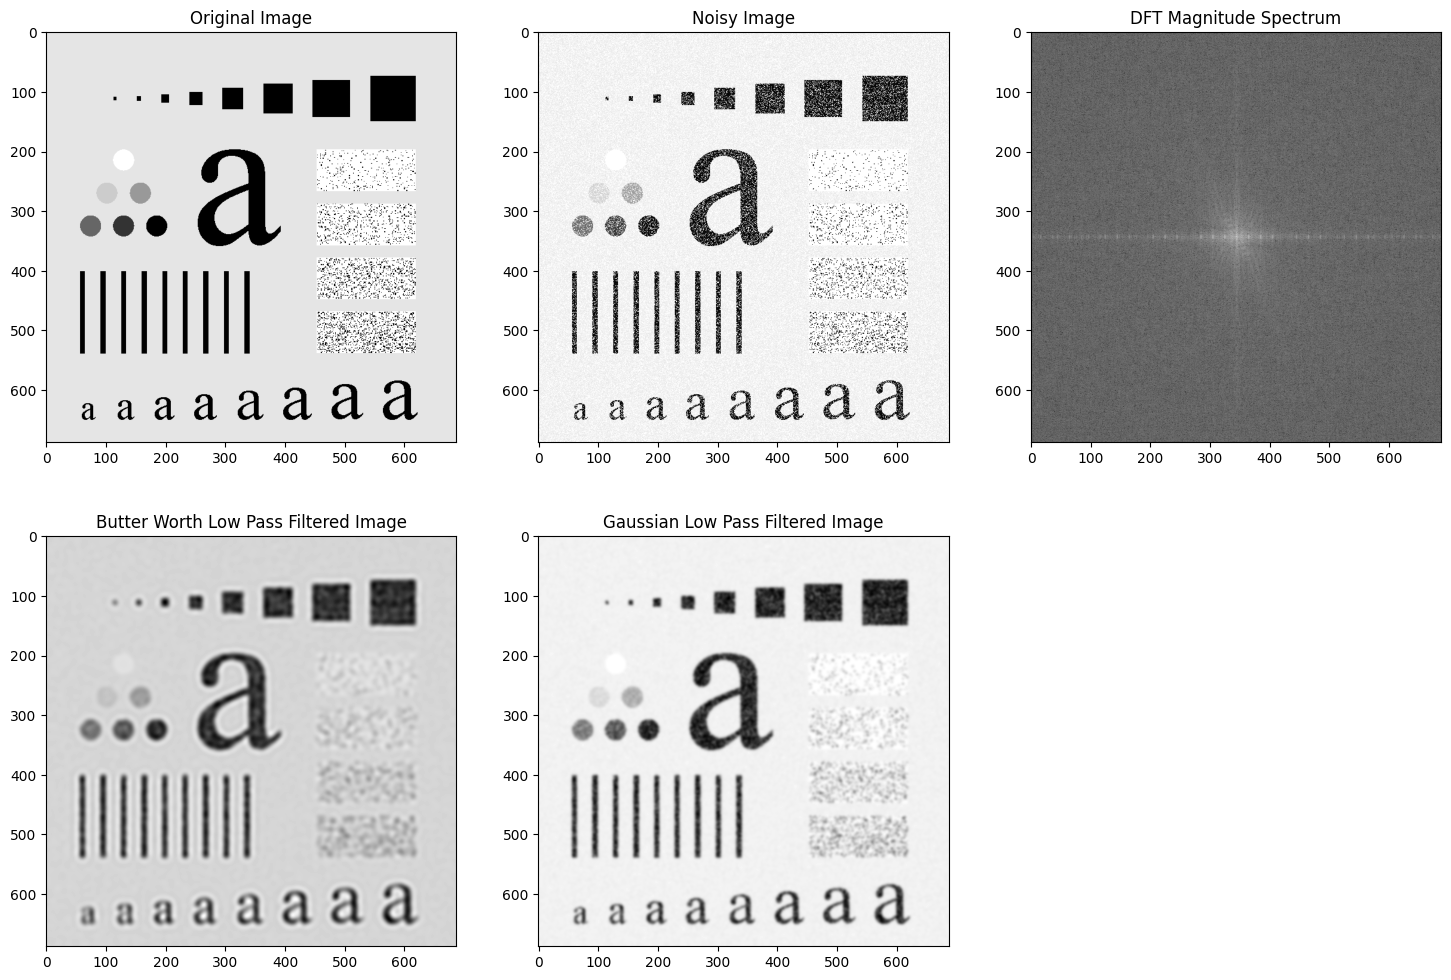

In [229]:
plt.figure(figsize=(18, 12))

plotImage(2, 3, 1, originalImage, "Original Image")
plotImage(2, 3, 2, noisyImage, "Noisy Image")
plotImage(2, 3, 3, magnitudeSpectrum, "DFT Magnitude Spectrum")

butterWorthImage = applyButterWorthFilter(fftImage, 4, 50)
butterWorthImage = np.fft.ifft2(np.fft.ifftshift(butterWorthImage)).real
plotImage(2, 3, 4, butterWorthImage, "Butter Worth Low Pass Filtered Image")

gaussainImage = applyGaussianFilter(fftImage, 50)
gaussainImage = np.fft.ifft2(np.fft.ifftshift(gaussainImage)).real
plotImage(2, 3, 5, gaussainImage, "Gaussian Low Pass Filtered Image")